# 1.数据处理

## 数据加载

先在kaggle上下载数据，dogs vs cats

In [6]:
import torch as t
from torch.utils import data
import os
from PIL import Image
import numpy as np

In [10]:
class DogCat(data.Dataset):
    def __init__(self,root):
        imgs = os.listdir(root)
        '''
        获取图片的路径列表
        当指定__getitem__时获取图片
        '''
        self.imgs = [os.path.join(root, img) for img in imgs]
    
    def __getitem__(self, index):
        img_path = self.imgs[index]
        
        label = 1 if 'dog' in img_path.split('/')[-1] else [0]
        
        pil_img = Image.open(img_path)
        array = np.asarray(pil_img)
        data = t.from_numpy(array)
        
        return data, label
    
    def __len__(self):
        return len(self.imgs)
    
        
        
        
        
        
    

In [11]:
dataset = DogCat('../../data/dogs-vs-cats/train_part/')


In [14]:
for img, label in dataset:
    print(img.size(),label)

torch.Size([374, 500, 3]) [0]
torch.Size([280, 300, 3]) [0]
torch.Size([396, 312, 3]) [0]
torch.Size([414, 500, 3]) [0]
torch.Size([375, 499, 3]) [0]
torch.Size([144, 175, 3]) [0]
torch.Size([303, 400, 3]) [0]
torch.Size([499, 495, 3]) [0]
torch.Size([345, 461, 3]) [0]
torch.Size([375, 499, 3]) 1
torch.Size([499, 327, 3]) 1
torch.Size([199, 187, 3]) 1
torch.Size([375, 499, 3]) 1
torch.Size([287, 300, 3]) 1
torch.Size([376, 499, 3]) 1
torch.Size([488, 499, 3]) 1
torch.Size([264, 299, 3]) 1
torch.Size([500, 469, 3]) 1


# 2.计算机视觉工具包torchvision

## 利用pytorchvision修改整合上面的图片数据

In [15]:
from torchvision import transforms as T

In [27]:
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
from torch.autograd import Variable as V
to_tensor = ToTensor()
to_pil = ToPILImage()

In [16]:
transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.5, .5, .5],std=[.5, .5, .5])
])

## 对上面的猫狗图片的类重新进行定义，将修改图片大小的操作加进去

In [17]:
class DogCat(data.Dataset):
    def __init__(self, root, transforms = None):
        imgs = os.listdir(root)
        '''
        获取图片的路径列表
        当指定__getitem__时获取图片
        '''
        self.imgs = [os.path.join(root, img) for img in imgs]
        self.transforms = transforms
    
    def __getitem__(self, index):
        img_path = self.imgs[index]
        
        label = 1 if 'dog' in img_path.split('/')[-1] else [0]
        
        data = Image.open(img_path)
#         array = np.asarray(pil_img)
        if self.transforms:
            data = self.transforms(data)
        
        
        return data, label
    
    def __len__(self):
        return len(self.imgs)
    
        

In [21]:
dataset = DogCat('../../data/dogs-vs-cats/train_part/',transform)


In [44]:
img, label = dataset[0]
for img, label in dataset:
#     print(img.type)
    print(img.size(),label)

torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) [0]
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1


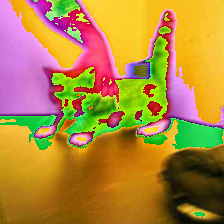

In [49]:
img, label = dataset[0]
img = V(img)
to_pil(img.data.squeeze(0))

# 3.可视化工具

## 数据加载

# 4.使用GPU加速

## 数据加载

# 5.持久化

## 数据加载

## 数据加载